<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_2_4)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-2.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.4_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,52.429684,0.007763,62.437447,62.429714,0.007733
1,0.0,1.0,36.722785,0.008791,46.731576,46.722685,0.008891
2,0.0,2.0,54.008036,-0.008234,63.999802,64.008079,-0.008277
3,0.0,3.0,24.711970,0.012930,34.724900,34.711771,0.013130
4,0.0,4.0,20.875193,0.036244,30.911438,30.874962,0.036476
...,...,...,...,...,...,...,...
249995,999.0,245.0,30.114134,0.010852,40.124985,40.116626,0.008360
249996,999.0,246.0,50.973611,0.001554,60.975165,60.974828,0.000337
249997,999.0,247.0,23.907992,0.012831,33.920822,33.910863,0.009959
249998,999.0,248.0,92.394610,0.001267,102.395877,102.393295,0.002583


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    52.429684  0.007763   62.437447   62.429714  0.007733
      1.0    36.722785  0.008791   46.731576   46.722685  0.008891
      2.0    54.008036 -0.008234   63.999802   64.008079 -0.008277
      3.0    24.711970  0.012930   34.724900   34.711771  0.013130
      4.0    20.875193  0.036244   30.911438   30.874962  0.036476
...                ...       ...         ...         ...       ...
999.0 245.0  30.114134  0.010852   40.124985   40.116626  0.008360
      246.0  50.973611  0.001554   60.975165   60.974828  0.000337
      247.0  23.907992  0.012831   33.920822   33.910863  0.009959
      248.0  92.394610  0.001267  102.395877  102.393295  0.002583
      249.0  33.858148  0.005547   43.863695   43.860411  0.003284

[250000 rows x 5 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    52.429684  0.007763   62.437447   62.429714  0.007733
      1.0    36.722785  0.008791   46.731576   46.722685  0.008891
      2.0    54.008036 -0.008234   63.999802   64.008079 -0.008277
      3.0    24.711970  0.012930   34.724900   34.711771  0.013130
      4.0    20.875193  0.036244   30.911438   30.874962  0.036476
...                ...       ...         ...         ...       ...
999.0 245.0  30.114134  0.010852   40.124985   40.116626  0.008360
      246.0  50.973611  0.001554   60.975165   60.974828  0.000337
      247.0  23.907992  0.012831   33.920822   33.910863  0.009959
      248.0  92.394610  0.001267  102.395877  102.393295  0.002583
      249.0  33.858148  0.005547   43.863695   43.860411  0.003284

[250000 rows x 5 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,52.429684,0.007763,62.437447,62.429714,0.007733
1,0.0,1.0,36.722785,0.008791,46.731576,46.722685,0.008891
2,0.0,2.0,54.008036,-0.008234,63.999802,64.008079,-0.008277
3,0.0,3.0,24.711970,0.012930,34.724900,34.711771,0.013130
4,0.0,4.0,20.875193,0.036244,30.911438,30.874962,0.036476
...,...,...,...,...,...,...,...
249995,999.0,245.0,30.114134,0.010852,40.124985,40.116626,0.008360
249996,999.0,246.0,50.973611,0.001554,60.975165,60.974828,0.000337
249997,999.0,247.0,23.907992,0.012831,33.920822,33.910863,0.009959
249998,999.0,248.0,92.394610,0.001267,102.395877,102.393295,0.002583


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    52.429684  0.007763   62.437447   62.429714  0.007733
      1.0    36.722785  0.008791   46.731576   46.722685  0.008891
      2.0    54.008036 -0.008234   63.999802   64.008079 -0.008277
      3.0    24.711970  0.012930   34.724900   34.711771  0.013130
      4.0    20.875193  0.036244   30.911438   30.874962  0.036476
...                ...       ...         ...         ...       ...
999.0 245.0  30.114134  0.010852   40.124985   40.116626  0.008360
      246.0  50.973611  0.001554   60.975165   60.974828  0.000337
      247.0  23.907992  0.012831   33.920822   33.910863  0.009959
      248.0  92.394610  0.001267  102.395877  102.393295  0.002583
      249.0  33.858148  0.005547   43.863695   43.860411  0.003284

[250000 rows x 5 columns]

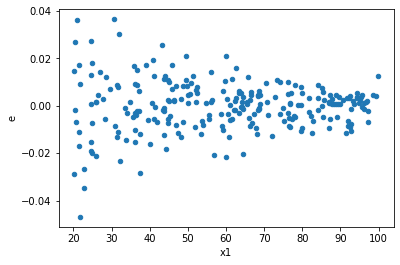

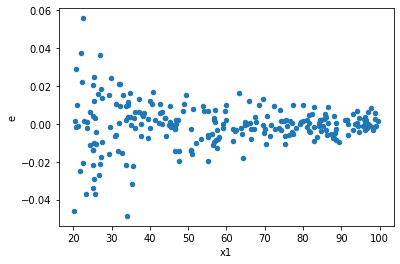

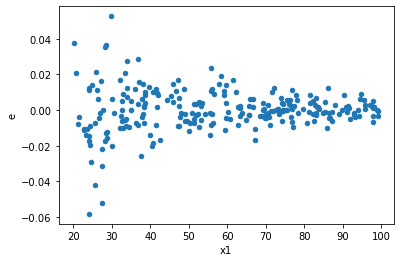

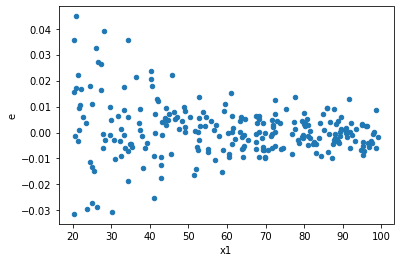

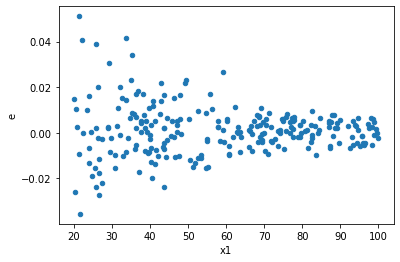

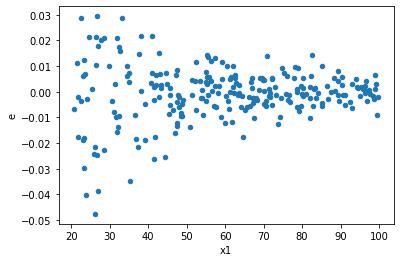

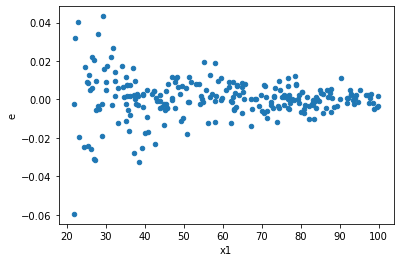

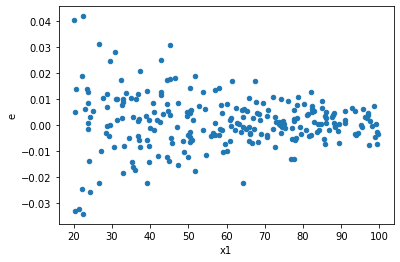

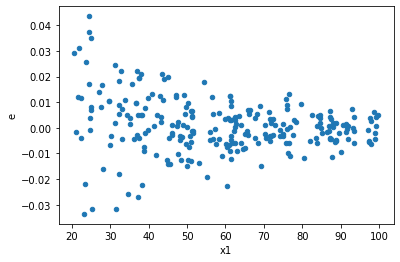

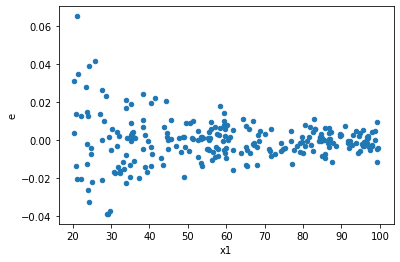

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,123.0,125.0,0.004012374004945625,0.03107847100969552,3.2620926869476626e-05,0.00024862776807756413,7.621726049427643,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
3.0,138.0,110.0,0.004360687247141532,0.02202098575636094,3.159918295030096e-05,0.00020019077960328126,6.3353150591944205,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
4.0,124.0,124.0,0.003608321001401286,0.02656987444696303,2.90993629145265e-05,0.0002142731810238954,7.363500762998818,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
6.0,126.0,122.0,0.003283906110963755,0.026298520128828443,2.6062746912410755e-05,0.00021556164040023313,8.270871874122577,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
8.0,128.0,120.0,0.004546011114008581,0.022266512904966163,3.551571182819204e-05,0.00018555427420805136,5.224568638963899,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
13.0,119.0,129.0,0.0031179585156210577,0.029253161525480475,2.62013320640425e-05,0.00022676869399597266,8.654853632696772,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
14.0,109.0,139.0,0.003997618443818302,0.029985135960856397,3.667539856714039e-05,0.0002157204025960892,5.881882979435855,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
15.0,141.0,107.0,0.004063181777273051,0.032847915043895275,2.8816892037397528e-05,0.00030698986022332034,10.653121780965133,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
18.0,117.0,131.0,0.003681226971602541,0.02852767856054592,3.146347838976531e-05,0.00021776853863012154,6.921311621443579,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,113.0,135.0,0.0226246988146005,0.006023831395099121,0.0002002185735805354,4.4620973297030526e-05,0.22286130851432873,5.959389672980103e-15,Reject001=0 : Heteroscedasticity
1.0,135.0,113.0,0.03262544711930776,0.003252569938002723,0.00024166997866153895,2.8783804761086044e-05,0.11910376671732996,5.216032888078371e-29,Reject001=0 : Heteroscedasticity
2.0,123.0,125.0,0.004012374004945625,0.03107847100969552,3.2620926869476626e-05,0.00024862776807756413,7.621726049427643,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
3.0,138.0,110.0,0.004360687247141532,0.02202098575636094,3.159918295030096e-05,0.00020019077960328126,6.3353150591944205,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
4.0,124.0,124.0,0.003608321001401286,0.02656987444696303,2.90993629145265e-05,0.0002142731810238954,7.363500762998818,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
5.0,121.0,127.0,0.024826955132393427,0.0037163474531453694,0.0002051814473751523,2.926257837122338e-05,0.14261805219513773,9.796154900653248e-24,Reject001=0 : Heteroscedasticity
6.0,126.0,122.0,0.003283906110963755,0.026298520128828443,2.6062746912410755e-05,0.00021556164040023313,8.270871874122577,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
7.0,121.0,127.0,0.022387441385314608,0.004398514039092035,0.00018502017673813724,3.4633968811748306e-05,0.1871902266138598,1.5774040135848507e-18,Reject001=0 : Heteroscedasticity
8.0,128.0,120.0,0.004546011114008581,0.022266512904966163,3.551571182819204e-05,0.00018555427420805136,5.224568638963899,2.220446049250313e-16,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64